# Introduction

**Ethereum** is a blockchain platform with its own cryptocurrency, called **Ether** (ETH) or Ethereum, and its own programming language, called Solidity.

As a blockchain network, Ethereum is a **decentralized** public ledger for verifying and recording transactions. The network's users can create, publish, monetize, and use **applications** on the platform, and use its Ether cryptocurrency as payment. Insiders call the decentralized applications on the network "dapps."

As a cryptocurrency, Ethereum is second in market value only to Bitcoin, as of May 2021.

In [1]:
!pip install mpl_finance

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

In [3]:
df = pd.read_csv("ETH-USD.csv",parse_dates=True)

In [4]:
df = df.drop(columns=['Adj Close'])

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,398.054460,413.880550,380.314871,399.066543,7.125412e+09
std,618.185352,646.694116,585.147027,619.488385,1.065180e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05
25%,13.864300,14.373900,13.254300,13.883900,3.911200e+07
50%,200.608871,206.361450,194.783997,200.634995,2.201160e+09
75%,391.488617,405.616364,381.273834,392.189972,9.818257e+09
max,4174.635742,4362.350586,3785.848633,4168.701172,8.448291e+10


In [7]:
df['100ma'] = df['Close'].rolling(window = 100, min_periods = 0).mean()

In [8]:
df

,Date,Open,High,Low,Close,Volume,100ma
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762723
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233947
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730
...,...,...,...,...,...,...,...
2176,2021-07-22,1994.822876,2044.116455,1954.297852,2025.202759,1.749548e+10,2543.801423
2177,2021-07-23,2025.105713,2129.441162,2000.436279,2124.776611,1.620039e+10,2540.698140
2178,2021-07-24,2123.961182,2197.649414,2107.323486,2189.218750,1.605745e+10,2537.399165
2179,2021-07-25,2187.145508,2194.438232,2108.829834,2191.373779,1.456648e+10,2534.993437


# Visualizations

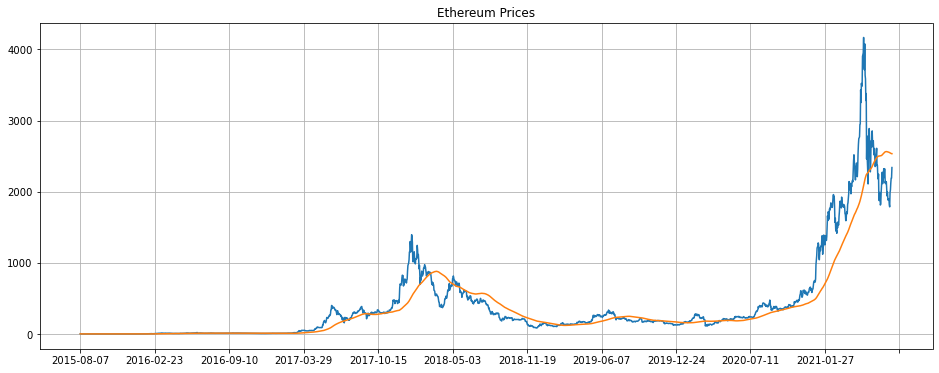

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Close)
ax.plot(df.Date, df['100ma'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Prices')
plt.grid()
plt.show()

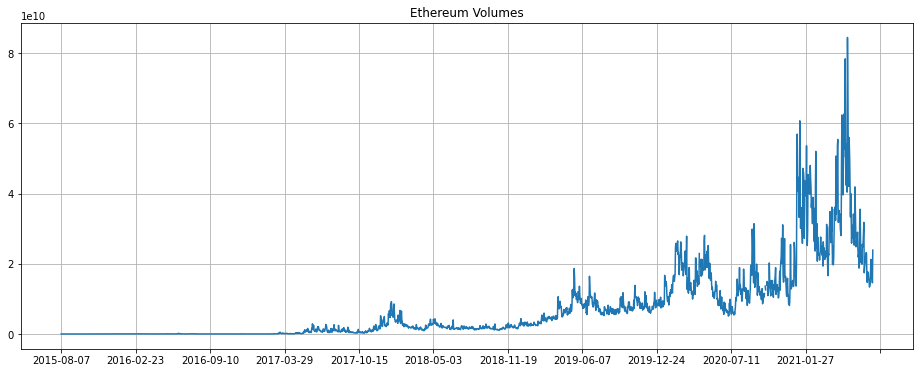

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Volume)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Volumes')
plt.grid()
plt.show()

# Market Cap

In [11]:
df['Total Traded'] = df['Open']*df['Volume']

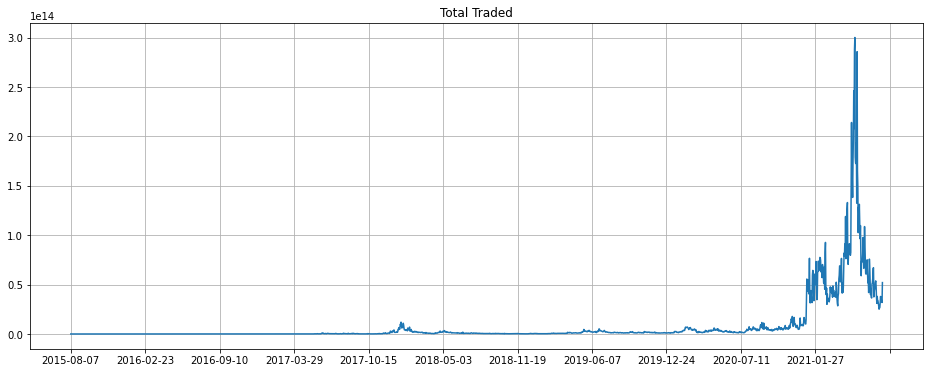

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Total Traded'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Total Traded')
plt.grid()
plt.show()

We notice a **huge spike** in Ethereum market cap somewhere in 2021 let's investigate more :

In [13]:
df.iloc[df['Total Traded'].argmax()]

Date             2021-05-13
Open                3828.92
High                4032.56
Low                 3549.41
Close               3715.15
Volume          7.83982e+10
100ma               2140.18
Total Traded     3.0018e+14
Name: 2106, dtype: object

After a quick web search we found out that around 13th March, Ethereum spiked due to the rise of NFTs and DeFi applications to quote from the article : 
> Ethereum’s growth is attributed to an increasing number of developers building **decentralized finance** (DeFi) applications on the Ethereum blockchain platform. The rise of **non-fungible tokens** (NFT) also increases demand for Ethereum.
> Lastly, continued institutional interest in treating crypto like any other security also helps ETH. Coinbase is the new NYSE. ETH is No. 2 on Coinbase after Bitcoin.
> Seeing how the DeFi and NFT movements are directly connected to Ethereum, their increased activity has been the main driver for ETH prices in 2021, says Andrew Moss, GSR Capital’s managing director. “Users need ETH to interact with these technologies, so the more people who are involved with these communities and protocols, the higher the value of ETH goes,” he says.

* Source : https://www.forbes.com/sites/kenrapoza/2021/05/16/ethereum-faces-weekend-rout-but-some-see-eth-doubling-from-here/?sh=6845bee93817

We are going to plot a candlestick plot for Ethereum prices from April 2021

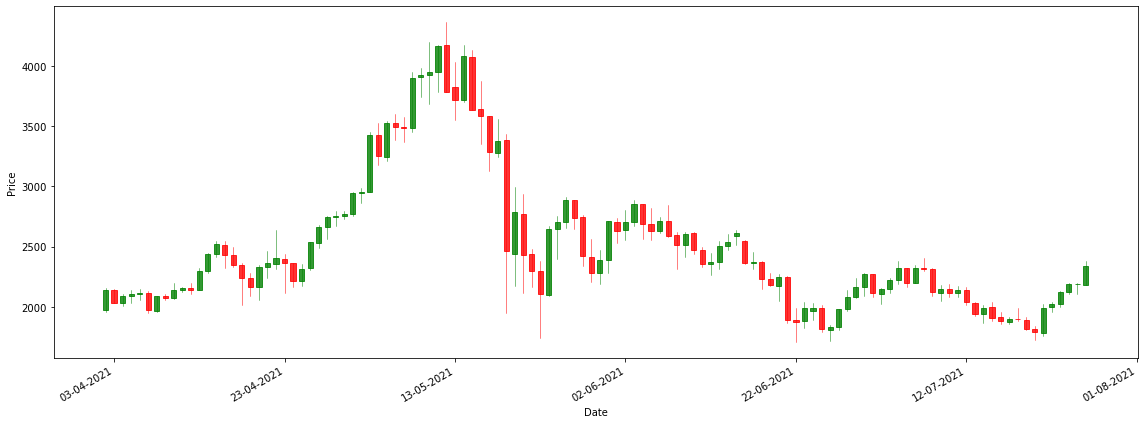

In [14]:
ohlc = df[(df['Date'] > '2021-04-01') & (df['Date'] <= '2021-07-26')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
fig, ax = plt.subplots(figsize = (16,6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

# Return on Investiment (ROI)